## Implementation - Task 1
Prepare the dataset by applying any pre-processing or cleaning steps that you consider as necessary. Then, split the dataset into a training set containing 70% of the samples and a test set containing 30% of the samples. Follow an appropriate strategy for the split. You must use these training/test sets for all the models in this coursework.

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('food_reviews.csv', low_memory=False)
df.head(5)

<ipython-input-2-50a99159b848>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Score,Summary,Text
0,5,three cheese,really good three cheese potatoes great with h...
1,5,Coffee ***UPDATE*** added,"I love coffee, and a particular fantasy of min..."
2,5,Delicious cocoa for grown ups!,"This is not sugary sweet hot chocolate, nor is..."
3,5,Really Good Fresh Murray's Sugar-Free Shortbread,These cookies arrived quickly and are in great...
4,3,OK Coffee,This is decent coffee. Nothing special. It is ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540031 entries, 0 to 540030
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Score    540031 non-null  int64 
 1   Summary  540004 non-null  object
 2   Text     540031 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.4+ MB


In [4]:
df.isna().sum()

Score       0
Summary    27
Text        0
dtype: int64

In [5]:
df.drop(labels=['Summary'], axis=1, inplace=True)
df = df[['Text', 'Score']]
df

,Text,Score
0,really good three cheese potatoes great with h...,5
1,"I love coffee, and a particular fantasy of min...",5
2,"This is not sugary sweet hot chocolate, nor is...",5
3,These cookies arrived quickly and are in great...,5
4,This is decent coffee. Nothing special. It is ...,3
...,...,...
540026,I loike coffee but when camping I do not have ...,5
540027,"I don't cook much, but I have a breadmaker and...",5
540028,if you want a healthy treat and one that is ve...,5
540029,These biscuits satisfy an urge for a sweet tre...,5


<Axes: xlabel='Score', ylabel='count'>

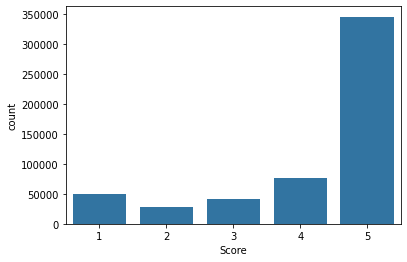

In [6]:
import seaborn as sns

sns.countplot(x="Score", data=df)

In [7]:
from sklearn.utils import resample

score1 = df[df['Score']==1]
score2 = df[df['Score']==2]
score3 = df[df['Score']==3]
score4 = df[df['Score']==4]
score5 = df[df['Score']==5]

score1_sampling = resample(score1, random_state=42, replace=True, n_samples=2000)
score2_sampling = resample(score2, random_state=42, replace=True, n_samples=2000)
score3_sampling = resample(score3, random_state=42, replace=True, n_samples=2000)
score4_sampling = resample(score4, random_state=42, replace=True, n_samples=2000)
score5_sampling = resample(score5, random_state=42, replace=True, n_samples=2000)

In [8]:
df = pd.concat([score1_sampling, score2_sampling, score3_sampling, score4_sampling, score5_sampling])
df = df.reset_index(drop=True)
df

,Text,Score
0,"Have had the other flavors , this tastes the w...",1
1,Love the Chai tea taste. Love the ease of use ...,1
2,I have ordered the SnackMasters Salmon Jerky a...,1
3,Each person has their acquired taste for Chili...,1
4,My family is very sensitive to everything. Lo...,1
...,...,...
9995,I love my Keurig and I wanted to try a new cof...,5
9996,These chews are among some of my Westie's favo...,5
9997,"the aroma is amazing, like a walk in my rose g...",5
9998,I have long loved this hot cocoa but each year...,5


<Axes: xlabel='Score', ylabel='count'>

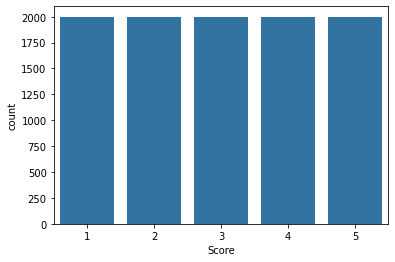

In [9]:
sns.countplot(x="Score", data=df)

In [10]:
import re
import nltk as nlp
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nlp.download('stopwords')
corpus = []

for i in range(0, len(df['Text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove('no')
    all_stopwords.remove('but')
    all_stopwords.remove("won't")
    lemma = nlp.WordNetLemmatizer()
    review = [lemma.lemmatize(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home3/vhww25/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from sklearn.model_selection import train_test_split
X = df["Text"].values
y = df["Score"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Implementation - Task 2
Implement a Naïve Bayes model for predicting the rating of a food review. Train your model on the training set and test it on the test set. Use an appropriate text representation.

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

model_NB = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_NB.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [13]:
y_pred_NB = model_NB.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred_NB)
print(cm)

[[288 193  82  43  20]
 [ 94 254 135  85  23]
 [ 56 118 243 164  29]
 [ 16  51 101 327  89]
 [ 21  29  48 209 282]]


In [15]:
accuracy_score(y_test, y_pred_NB)

0.4646666666666667

## Implementation - Task 3
Implement a k-Nearest Neighbours model for predicting the rating of a food review. Train your model on the training set and test it on the test set. Use an appropriate text representation. You must select the best k by examining the performance of the model for $k \in \{1,3,5,7\}$, using an appropriate cross-validation approach. Create a plot for k vs. classification performance to justify your choice.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

k_values = [1, 3, 5, 7]
scores = []

for k in k_values:
    knn = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=k))
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

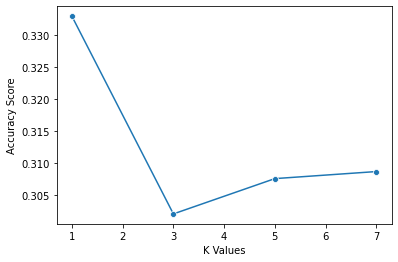

In [17]:
import matplotlib.pyplot as plt

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [18]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=best_k))
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_KNN)
print("Best K: ", best_k)
print("Accuracy: ", accuracy)

Best K:  1
Accuracy:  0.345


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)

[[219 117 125 101  64]
 [ 83 212 120 105  71]
 [ 83 112 208 141  66]
 [ 50 102 107 209 116]
 [ 66  95 111 130 187]]


In [20]:
accuracy_score(y_test, y_pred_KNN)

0.345

## Implementation - Task 4
Implement a Convolutional Neural Network (CNN) model for predicting the rating of a food review. The model must have at least two convolutional layers. Train your model on the training set and test it on the test set. Use an appropriate text representation.

In [21]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

MAX_VOCABULARY_WORDS = 5000
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = 10

vectorize_layer = TextVectorization(max_tokens=MAX_VOCABULARY_WORDS, output_mode='int', output_sequence_length=MAX_SEQUENCE_LENGTH)
vectorize_layer.adapt(X_train)
vocabulary = vectorize_layer.get_vocabulary()

print("Vocabulary size: " + str(len(vocabulary)) + " words")

Vocabulary size: 5000 words


In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Embedding, Dense, GlobalMaxPooling1D, Conv1D, Flatten

In [24]:
model_CNN = Sequential(name="CNN")
model_CNN.add(Input(shape=(1,), dtype=tf.string))
model_CNN.add(vectorize_layer)
model_CNN.add(Embedding(input_dim=MAX_VOCABULARY_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model_CNN.add(Conv1D(64, 3, activation='relu'))
model_CNN.add(Conv1D(64, 3, activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Flatten())
model_CNN.add(Dense(6, activation='softmax'))

model_CNN.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 200)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 200, 10)           50000     
                                                                 
 conv1d (Conv1D)             (None, 198, 64)           1984      
                                                                 
 conv1d_1 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 flatten (Flatten)           (None, 64)                0       

In [25]:
from tensorflow.keras.optimizers import Adam

EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.01

opt = Adam(learning_rate=LEARNING_RATE)
model_CNN.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True, mode="auto")

history_CNN = model_CNN.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, callbacks=[early])

Epoch 1/50
99/99 [==============================] - 4s 32ms/step - loss: 1.5721 - accuracy: 0.2670 - val_loss: 1.4393 - val_accuracy: 0.3529
Epoch 2/50
99/99 [==============================] - 3s 29ms/step - loss: 1.3138 - accuracy: 0.4310 - val_loss: 1.3238 - val_accuracy: 0.4386
Epoch 3/50
99/99 [==============================] - 3s 29ms/step - loss: 1.0785 - accuracy: 0.5459 - val_loss: 1.3602 - val_accuracy: 0.4271
Epoch 4/50
99/99 [==============================] - 3s 29ms/step - loss: 0.8457 - accuracy: 0.6505 - val_loss: 1.6046 - val_accuracy: 0.4243
Epoch 5/50
99/99 [==============================] - 3s 29ms/step - loss: 0.6341 - accuracy: 0.7479 - val_loss: 2.0119 - val_accuracy: 0.4271
Epoch 6/50
99/99 [==============================] - 3s 29ms/step - loss: 0.4886 - accuracy: 0.8162 - val_loss: 2.4019 - val_accuracy: 0.4400
Epoch 7/50
99/99 [==============================] - 3s 29ms/step - loss: 0.3337 - accuracy: 0.8765 - val_loss: 3.0390 - val_accuracy: 0.4314
Epoch 8/50
99

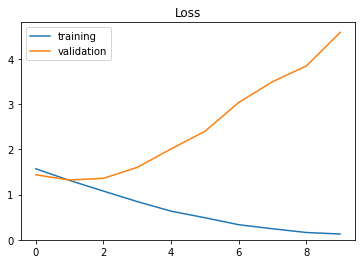

In [27]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history_CNN.history['loss'], label='training')
plt.plot(history_CNN.history['val_loss'], label='validation')
plt.ylim(bottom=0.0)
plt.legend()
plt.show()

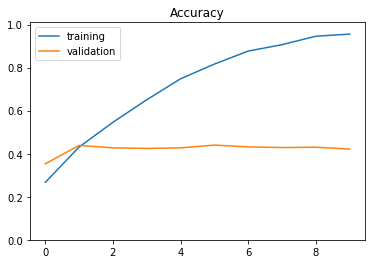

In [28]:
plt.title('Accuracy')
plt.plot(history_CNN.history['accuracy'], label='training')
plt.plot(history_CNN.history['val_accuracy'], label='validation')
plt.ylim(bottom=0.0,top=1.01)
plt.legend()
plt.show()

In [29]:
pred_CNN = model_CNN.predict(X_test)
print("Predicted values:\n" + str(pred_CNN))

pred_CNN = pred_CNN.round()
print("Rounded values:\n" + str(pred_CNN))

94/94 [==============================] - 1s 5ms/step
Predicted values:
[[3.2048914e-17 5.2548381e-05 1.0904317e-03 4.5455396e-02 9.0925276e-01
  4.4148762e-02]
 [7.6311750e-16 2.3478823e-02 1.0571059e-01 1.8558852e-01 5.4897821e-01
  1.3624382e-01]
 [3.0249789e-11 6.8201810e-01 3.1446490e-01 3.5056544e-03 1.0282193e-05
  1.2282601e-06]
 ...
 [1.3201379e-15 6.3144743e-02 9.0945822e-01 2.2658795e-02 4.7081858e-03
  2.9895342e-05]
 [7.4475381e-22 1.8567673e-03 3.8353659e-02 3.7875235e-01 5.7786554e-01
  3.1716279e-03]
 [2.3187840e-19 9.2220968e-01 7.1795292e-02 4.9750735e-03 9.9796592e-04
  2.2016780e-05]]
Rounded values:
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]]


## Implementation - Task 5
Implement a Recurrent Neural Network (RNN) or a Long Short-Term Memory (LSTM) model for predicting the rating of a food review. The model must have at least two RNN/LSTM layers. Train your model on the training set and test it on the test set. Use an appropriate text representation.

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Bidirectional

In [31]:
model_LSTM = Sequential(name="LSTM")
model_LSTM.add(Input(shape=(1,), dtype=tf.string))
model_LSTM.add(vectorize_layer)
model_LSTM.add(Embedding(input_dim=MAX_VOCABULARY_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model_LSTM.add(Bidirectional(LSTM(16, return_sequences=True)))
model_LSTM.add(Bidirectional(LSTM(16, go_backwards=True, dropout=0.2)))
model_LSTM.add(Dense(6, activation='softmax'))

model_LSTM.summary()

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 200)               0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 200, 10)           50000     
                                                                 
 bidirectional (Bidirection  (None, 200, 32)           3456      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                6272      
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                              

In [32]:
from tensorflow.keras.optimizers import Adam

EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.01

opt = Adam(learning_rate=LEARNING_RATE)
model_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True, mode="auto")

history_LSTM = model_LSTM.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, callbacks=[early])

Epoch 1/50
99/99 [==============================] - 29s 233ms/step - loss: 1.5723 - accuracy: 0.2646 - val_loss: 1.5308 - val_accuracy: 0.3371
Epoch 2/50
99/99 [==============================] - 22s 219ms/step - loss: 1.4596 - accuracy: 0.3581 - val_loss: 1.4865 - val_accuracy: 0.3543
Epoch 3/50
99/99 [==============================] - 22s 218ms/step - loss: 1.3323 - accuracy: 0.4281 - val_loss: 1.4533 - val_accuracy: 0.3814
Epoch 4/50
99/99 [==============================] - 22s 218ms/step - loss: 1.1827 - accuracy: 0.5121 - val_loss: 1.4121 - val_accuracy: 0.4229
Epoch 5/50
99/99 [==============================] - 22s 219ms/step - loss: 1.0558 - accuracy: 0.5640 - val_loss: 1.4498 - val_accuracy: 0.4143
Epoch 6/50
99/99 [==============================] - 22s 219ms/step - loss: 0.9415 - accuracy: 0.6170 - val_loss: 1.4602 - val_accuracy: 0.4086
Epoch 7/50
99/99 [==============================] - 22s 218ms/step - loss: 0.8693 - accuracy: 0.6533 - val_loss: 1.5222 - val_accuracy: 0.4186

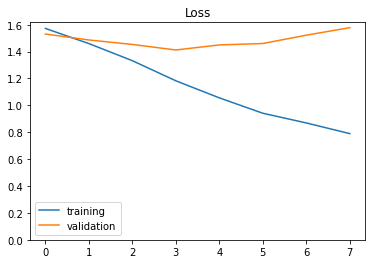

In [34]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history_LSTM.history['loss'], label='training')
plt.plot(history_LSTM.history['val_loss'], label='validation')
plt.ylim(bottom=0.0)
plt.legend()
plt.show()

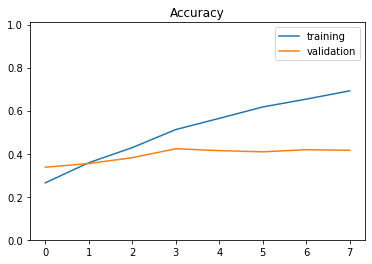

In [35]:
plt.title('Accuracy')
plt.plot(history_LSTM.history['accuracy'], label='training')
plt.plot(history_LSTM.history['val_accuracy'], label='validation')
plt.ylim(bottom=0.0,top=1.01)
plt.legend()
plt.show()

In [36]:
pred_LSTM = model_LSTM.predict(X_test)
print("Predicted values:\n" + str(pred_LSTM))

pred_LSTM = pred_LSTM.round()
print("Rounded values:\n" + str(pred_LSTM))

94/94 [==============================] - 5s 40ms/step
Predicted values:
[[3.5179651e-04 9.5924791e-03 1.5666237e-02 4.9017400e-02 4.6510339e-01
  4.6026865e-01]
 [5.5334629e-05 1.4287561e-02 1.2238193e-02 2.2356704e-02 3.0626723e-01
  6.4479500e-01]
 [2.5973321e-04 9.3113162e-02 3.9086881e-01 4.2371345e-01 7.7664450e-02
  1.4380430e-02]
 ...
 [1.5331017e-04 4.5868270e-02 2.8425834e-01 5.6375575e-01 9.7014152e-02
  8.9502037e-03]
 [1.9992374e-04 6.3437492e-02 8.4123813e-02 1.3286196e-01 4.5431650e-01
  2.6506034e-01]
 [1.4351595e-04 7.2458684e-01 1.7211170e-01 5.9207223e-02 2.6208919e-02
  1.7741852e-02]]
Rounded values:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


## Implementation - Task 6
Compute the confusion matrix, accuracy, F1-score, precision and recall for each model.

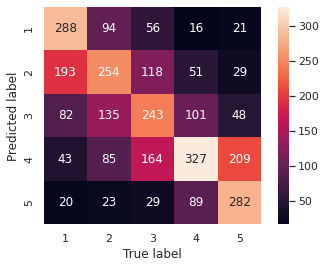

Accuracy:	0.464667
F1-score:	0.468507
Precision:	0.486125
Recall:		0.465383


In [37]:
# NB

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

mat_NB = confusion_matrix(y_test, y_pred_NB)
sns.heatmap(mat_NB.T, square=True, annot=True, fmt="d", xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

print("Accuracy:\t%f" % accuracy_score(y_test, y_pred_NB))
print("F1-score:\t%f" % f1_score(y_test, y_pred_NB, average='macro'))
print("Precision:\t%f" % precision_score(y_test, y_pred_NB, average='macro'))
print("Recall:\t\t%f" % recall_score(y_test, y_pred_NB, average='macro'))

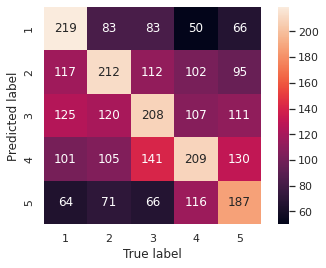

Accuracy:	0.345000
F1-score:	0.345939
Precision:	0.351019
Recall:		0.344980


In [38]:
# KNN

mat_KNN = confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(mat_KNN.T, square=True, annot=True, fmt="d", xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

print("Accuracy:\t%f" % accuracy_score(y_test, y_pred_KNN))
print("F1-score:\t%f" % f1_score(y_test, y_pred_KNN, average='macro'))
print("Precision:\t%f" % precision_score(y_test, y_pred_KNN, average='macro'))
print("Recall:\t\t%f" % recall_score(y_test, y_pred_KNN, average='macro'))

94/94 [==============================] - 0s 5ms/step


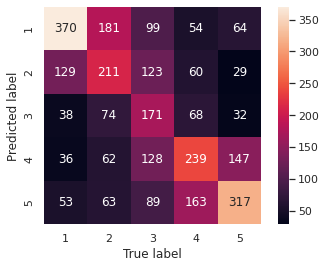

Accuracy:	0.436000
F1-score:	0.428354
Precision:	0.432758
Recall:		0.435170


In [39]:
# CNN

pred_CNN = model_CNN.predict(X_test)
pred_CNN = np.argmax(pred_CNN, axis=1)

mat_CNN = confusion_matrix(y_test, pred_CNN)
sns.heatmap(mat_CNN.T, square=True, annot=True, fmt="d", xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

print("Accuracy:\t%f" % accuracy_score(y_test, pred_CNN))
print("F1-score:\t%f" % f1_score(y_test, pred_CNN, average='macro'))
print("Precision:\t%f" % precision_score(y_test, pred_CNN, average='macro'))
print("Recall:\t\t%f" % recall_score(y_test, pred_CNN, average='macro'))

94/94 [==============================] - 4s 40ms/step


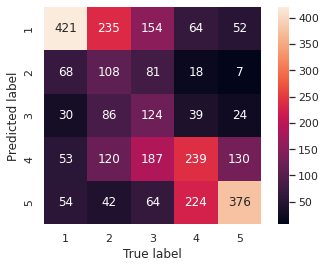

Accuracy:	0.422667
F1-score:	0.396616
Precision:	0.413889
Recall:		0.421232


In [40]:
# LSTM

pred_LSTM = model_LSTM.predict(X_test)
pred_LSTM = np.argmax(pred_LSTM, axis=1)

mat_LSTM = confusion_matrix(y_test, pred_LSTM)
sns.heatmap(mat_LSTM.T, square=True, annot=True, fmt="d", xticklabels=['1','2','3','4','5'], yticklabels=['1','2','3','4','5'])
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

print("Accuracy:\t%f" % accuracy_score(y_test, pred_LSTM))
print("F1-score:\t%f" % f1_score(y_test, pred_LSTM, average='macro'))
print("Precision:\t%f" % precision_score(y_test, pred_LSTM, average='macro'))
print("Recall:\t\t%f" % recall_score(y_test, pred_LSTM, average='macro'))

## Implementation - Task 7
Store the **four** trained models in files and implement a function `predict_food_review(text, model)` that given a <ins>text string</ins> (“`text`”) and model <ins>filename</ins> (“`model`”), it will load the pre-trained model, and predict the food review rating of the input text. The function should be able to work without requiring to rerun all or part of your code.

In [41]:
import pickle

def train_NB(X_train, y_train):
    model = make_pipeline(TfidfVectorizer(), MultinomialNB())
    model.fit(X_train, y_train)
    return model

def train_KNN(X_train, y_train):
    model = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=1))
    model.fit(X_train, y_train)
    return model

def train_CNN(X_train, y_train, MAX_VOCABULARY_WORDS, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM, EPOCHS, BATCH_SIZE, LEARNING_RATE):
    vectorize_layer = TextVectorization(max_tokens=MAX_VOCABULARY_WORDS, output_mode='int', output_sequence_length=MAX_SEQUENCE_LENGTH)
    vectorize_layer.adapt(X_train)
    
    model = Sequential()
    model.add(Input(shape=(1,), dtype=tf.string))
    model.add(vectorize_layer)                      
    model.add(Embedding(input_dim=MAX_VOCABULARY_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    model.add(Dense(6, activation='softmax'))
    
    opt = Adam(learning_rate=LEARNING_RATE)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    early = EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True, mode="auto")
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, callbacks=[early])
    return model

def train_LSTM(X_train, y_train, MAX_VOCABULARY_WORDS, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM, EPOCHS, BATCH_SIZE, LEARNING_RATE):
    vectorize_layer = TextVectorization(max_tokens=MAX_VOCABULARY_WORDS, output_mode='int', output_sequence_length=MAX_SEQUENCE_LENGTH)
    vectorize_layer.adapt(X_train)
    
    model = Sequential()
    model.add(Input(shape=(1,), dtype=tf.string))
    model.add(vectorize_layer)
    model.add(Embedding(input_dim=MAX_VOCABULARY_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    model.add(Bidirectional(LSTM(16, return_sequences=True)))
    model.add(Bidirectional(LSTM(16, go_backwards=True, dropout=0.2)))
    model.add(Dense(6, activation='softmax'))
    
    opt = Adam(learning_rate=LEARNING_RATE)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    early = EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True, mode="auto")
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, callbacks=[early])
    return model

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
        
def predict_food_review(model, model_filename):
    with open(model_filename, 'rb') as file:
        model = pickle.load(file)        
    if 'CNN' in model_filename or 'LSTM' in model_filename:
        pred = model.predict([text])
        pred = np.argmax(pred, axis=1)
    else:
        pred = model.predict([text])
        pred = pred[0].round().astype(int)
    return pred

In [42]:
# usage

model_NB = train_NB(X_train, y_train)
save_model(model_NB, 'model_NB.pkl')

model_KNN = train_KNN(X_train, y_train)
save_model(model_KNN, 'model_KNN.pkl')

MAX_VOCABULARY_WORDS = 5000
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = 10
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.01

model_CNN = train_CNN(X_train, y_train, MAX_VOCABULARY_WORDS, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM, EPOCHS, BATCH_SIZE, LEARNING_RATE)
save_model(model_CNN, 'model_CNN.pkl')

model_LSTM = train_LSTM(X_train, y_train, MAX_VOCABULARY_WORDS, MAX_SEQUENCE_LENGTH, EMBEDDING_DIM, EPOCHS, BATCH_SIZE, LEARNING_RATE)
save_model(model_LSTM, 'model_LSTM.pkl')

Epoch 1/50
99/99 [==============================] - 4s 31ms/step - loss: 1.5896 - accuracy: 0.2441 - val_loss: 1.4520 - val_accuracy: 0.3286
Epoch 2/50
99/99 [==============================] - 3s 29ms/step - loss: 1.3301 - accuracy: 0.4229 - val_loss: 1.3645 - val_accuracy: 0.4129
Epoch 3/50
99/99 [==============================] - 3s 29ms/step - loss: 1.1239 - accuracy: 0.5184 - val_loss: 1.3691 - val_accuracy: 0.4200
Epoch 4/50
99/99 [==============================] - 3s 29ms/step - loss: 0.8641 - accuracy: 0.6440 - val_loss: 1.6721 - val_accuracy: 0.4429
Epoch 5/50
99/99 [==============================] - 3s 29ms/step - loss: 0.6601 - accuracy: 0.7386 - val_loss: 1.8843 - val_accuracy: 0.4500
Epoch 6/50
99/99 [==============================] - 3s 29ms/step - loss: 0.4779 - accuracy: 0.8197 - val_loss: 2.4739 - val_accuracy: 0.4314
Epoch 7/50
99/99 [==============================] - 3s 29ms/step - loss: 0.3606 - accuracy: 0.8662 - val_loss: 2.8609 - val_accuracy: 0.4257
Epoch 8/50
99

In [43]:
text = "the food and the place are really good"

score_NB = predict_food_review(text, "model_NB.pkl")
print("NB: ", score_NB)
score_KNN = predict_food_review(text, "model_KNN.pkl")
print("KNN: ", score_KNN)
score_CNN = predict_food_review(text, "model_CNN.pkl")
print("CNN: ", score_CNN)
score_LSTM = predict_food_review(text, "model_LSTM.pkl")
print("LSTM: ", score_LSTM)

NB:  4
KNN:  4
1/1 [==============================] - 0s 112ms/step
CNN:  [4]
1/1 [==============================] - 1s 1s/step
LSTM:  [4]


## Report - Task 1
Critical discussion about the dataset (suitability, problems, class balance, etc.).

The dataset shows the 540,031 food reviews with scores between 1 and 5. It is composed of the score and the review text and summary of the text. When I checked the dataset, I found that reviews contain HTML tags, capital letters, punctuation marks, numbers, and so on. In order to create the model, it is necessary to perform the text preprocessing process. In addition, the summary's text is not enough to predict the score, so I decided to remove the 'summary' column and focus on the 'text' column. Through the box plot, I can see that the most data is skewed towards score 5. When the dataset is not balanced, there is a chance that the prediction outcome will be biased. To add to that, the whole dataset is too large to make the models in this environment, so I opted to reduce it and make it balanced. Finally, I have obtained the dataframe that contains 10,000 reviews (text) and the score from 1 to 5.

## Report - Task 2
Description and justification of the data preparation step(s) used.

For data preparation, preprocessing is necessary. First of all, I downloaded stop words from the NLTK library and created an empty list with the name corpus. For applying to the whole reviews, I used for loop. In the beginning, I substituted non-alphabetical letters into blank with re.sub function. In the second step, I made whole sentences for the lower alphabet and then split the sentences. Third, I removed all stop words, including negator. Fourth, I opted to use lemmatization instead of stemming for text normalization. In general, stemming tends to be faster than lemmatization, but lemmatization has a high level of accuracy. Finally, I joined the words with an empty space between them and appended them to the corpus list. After preprocessing, I used the sklearn library function to divide the dataset into a training set that has 70% of the samples and a test set that has 30% of the samples.

## Report - Task 3
Description and commentary on the machine learning architectures used, including a description and justification of the text representation method(s) used.

### Naive Bayes Model (NB)   
The Naive Bayes classifier is a probabilistic machine learning model based on Bayes’ theorem. The probability of a given input belonging to a particular class is calculated based on the assumption of independence between features. To predict review scores, I trained a Naive Bayes classifier using the training set. In order to do this, I created a model pipeline that computes the TF-IDF vectors for the input text initially. And then Multinomial Naive Bayes model is trained by using the TF-IDF vectors and class labels from the input text.

### k-Nearest Neighbours Model (KNN)   
The k-Nearest Neighbour algorithm is a supervised learning classifier that uses proximity to classify or predict the grouping of individual data points without using parameters. While the KNN algorithm can be utilized for both regression and classification issues, it is commonly used as a classification algorithm, assuming that similar points can be found near each other. For selecting the best k by examining its performance, I used for loop for k = [1, 3, 5, 7]. I utilised the cross_val_score function to produce a cross-validated accuracy score for every data point in the dataset. The number of cross-validations, which I have set to cv=5, determines how many times the process repeats. After finding the best k, I build the kNN model by setting up a pipeline where the input is first converted to TF-IDF vectors. The input text's TF-IDF vectors and class labels are used to train a k-Nearest Neighbours model.

### Convolutional Neural Network (CNN)   
Deep learning neural network architecture commonly uses Convolutional Neural 
Networks in computer vision. The field of Artificial Intelligence called Computer Vision allows computers to comprehend and interpret images or visual data. Neural networks are employed in a variety of datasets, such as images, audio, and text. In order to achieve this, I first develop a preprocessing layer that converts text features into integer sequences. The embedding layer converts text into a list of numbers that correspond to tokens in the vocabulary, and then into a list of embeddings of the required size. Then I added two stacked Conv1D layers with 64 units, each with the 'relu' activation function. The input is downsampled by a GlobalMaxPooling1D layer that takes the maximum value, and a Flatten layer flattens it by reshaping to a one-dimensional tensor. A dense layer has 6 units in the fully connected layer. Due to a binary problem, the output layer is employing the sigmoid activation function. After defining the network architecture, I defined the hyperparameters of my network, including the optimizer, loss function, and performance metrics. They will be used for training the model, and initialize a model using the network that I defined. As the label is an integer, I used sparse categorical cross entropy for the loss function. In the end, I instructed the model by setting up a callback function that will end the training after 4 epochs without any increase in validation accuracy.

### Long Short-Term Memory Model (LSTM)   
In deep learning, Long Short-Term Memory is a popular recurrent neural network architecture. It is well-suited for sequence prediction tasks due to its ability to capture long-term dependencies. Feedback connections in LSTM allow it to process entire sequences of data, not just individual data points, unlike traditional neural networks. To do this, I followed the same process as CNN by creating a preprocessing layer and an embedding layer. Following that, I stacked two bidirectional LSTM layers and include a dropout layer at the end of the latter LSTM layer. Likewise, a dense layer is with 6 units in the fully connected layer and the output layer is with the sigmoid activation function. After defining the architecture of my network, I also defined the hyperparameters of my network and initialized a model. As the label is an integer again, I used sparse categorical cross entropy for the loss function. In the end, I trained the model by creating a callback function that terminates training after 4 epochs with no improvement in validation accuracy.

## Report - Task 4
Detailed performance evaluation of the trained machine learning models in terms of the computed performance metrics.

To succeed in data science and predictive modelling, it is crucial to accurately measure a model's performance as much as to pursue the model itself. F1-score, precision, and recall are the primary terms that are important. These are aimed at obtaining a more precise understanding of a classifier's performance, not just evaluating its overall accuracy.   
   
### Accuracy   
Model evaluation commonly uses the metric of accuracy, which is the number of correct predictions across all predictions. Among my models, NB (0.46), CNN (0.44), LSTM (0.42), and KNN (0.35) had the highest accuracy in that order.   
      
### F1-Score   
F1-Score is measured by combining precision and recall. It is advantageous in situations where false positives and false negatives are given equal weight. Among my models, NB (0.47), CNN (0.43), LSTM (0.40), and KNN (0.35) had the highest f1-score in that order.
   
### Precision   
The number of positive predictions that are accurate is what precision measures. Among my models, NB (0.49), CNN (0.43), LSTM (0.41), and KNN (0.35) had the highest precision in that order.

### Recall   
Recall measures the number of positive cases the classifier correctly predicted across all the positive cases in the data. It can also be known as sensitivity. Among my models, NB (0.47), CNN (0.44), LSTM (0.42), and KNN (0.34) had the highest recall in that order.

### Overall   
To sum up, I can conclude that the Naive Bayes Model gives the highest prediction performance out of my models. Separately, when I give 'the food and the place are really good' to my models, I can get the same prediction labels that score 4.